# Tree Height Analysis for NEON SOAP and SJER Sites
The following Notebook uses functions from lidar_tools.py to extract, process and plot tree height data for the NEON SOAP and SJER sites.

### Author: Paula Pérez

In [9]:
# Import packages
import os
import pathlib

import earthpy as et

import lidar_tools

# Download CHM data
et.data.get_data('spatial-vector-lidar')

# Set up working dir
working_dir = os.path.join(
    pathlib.Path.home(),
    "Documents",
    "earth-analytics",
    "data",
    "spatial-vector-lidar")

os.chdir(working_dir)

In [10]:
# Specify SJER data filepaths
sjer_base_dir = os.path.join("california",
                             "neon-sjer-site")

sjer_insitu_path = os.path.join(sjer_base_dir,
                                "2013",
                                "insitu",
                                "veg_structure",
                                "D17_2013_SJER_vegStr.csv")

sjer_plots_path = os.path.join(sjer_base_dir,
                               "vector_data",
                               "SJER_plot_centroids.shp")

sjer_chm_path = os.path.join(sjer_base_dir,
                             "2013",
                             "lidar",
                             "SJER_lidarCHM.tif")

# Specify SOAP data filepaths
soap_base_dir = os.path.join("california",
                             "neon-soap-site")

soap_insitu_path = os.path.join(soap_base_dir,
                                "2013",
                                "insitu",
                                "veg-structure",
                                "D17_2013_SOAP_vegStr.csv")

soap_plots_path = os.path.join(soap_base_dir,
                               "vector_data",
                               "SOAP_centroids.shp")

soap_chm_path = os.path.join(soap_base_dir,
                             "2013",
                             "lidar",
                             "SOAP_lidarCHM.tif")

Based on the specified data paths (standard for downloads through earthpy), the following functions calculate the max and mean tree heights at both sites, then combine them into a single df. The following cell plots the data alongside linear regressions for analysis.

In [11]:
# Calculate lidar and insitu statistics
sjer_df = lidar_tools.calc_height_stats(plots_path = sjer_plots_path, 
                            chm_path = sjer_chm_path, 
                            insitu_path = sjer_insitu_path)

soap_df = lidar_tools.calc_height_stats(plots_path = soap_plots_path, 
                                        chm_path = soap_chm_path, 
                                        insitu_path = soap_insitu_path,
                                        id_colname = 'ID')

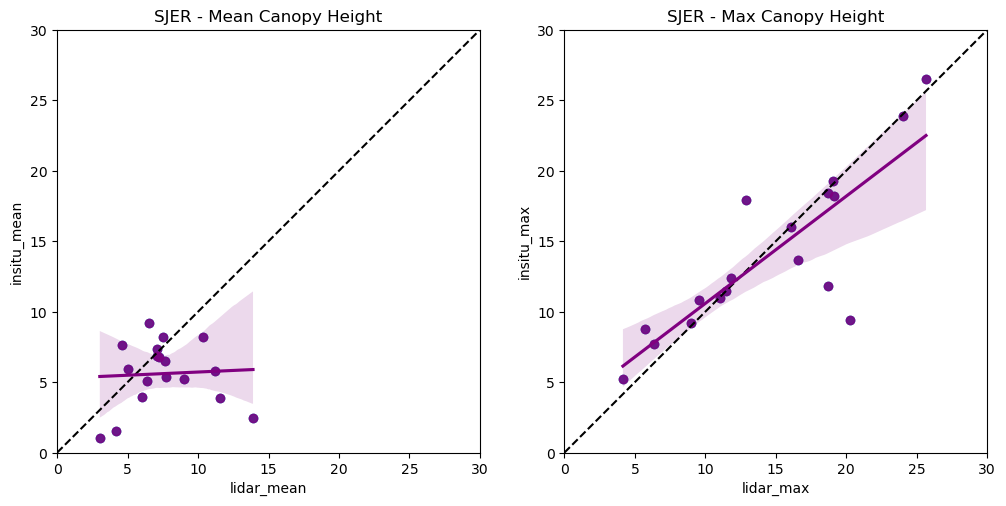

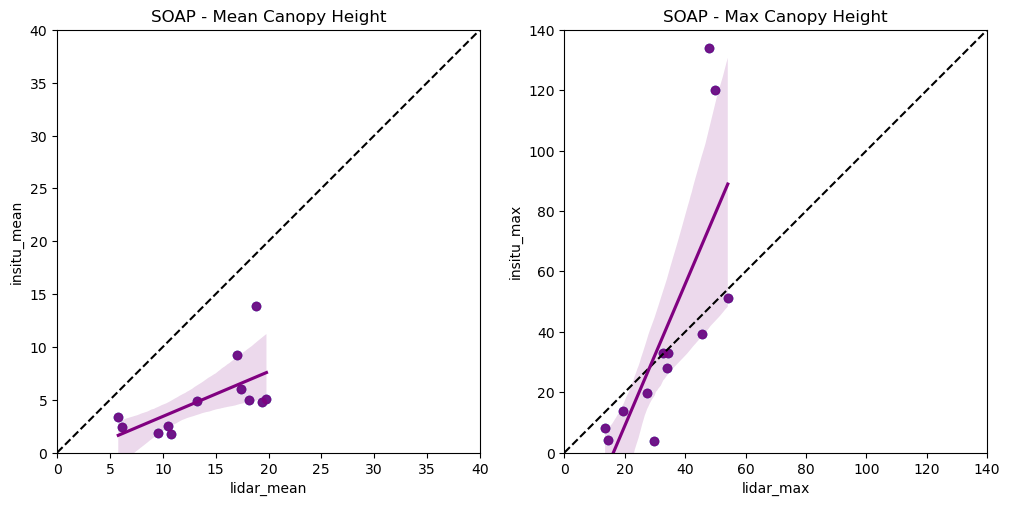

In [12]:
# Plot the data for both sites        
lidar_tools.plot_max_mean_height(stats_df = sjer_df,
                     mean_axis_max = 30,
                     max_axis_max = 30,
                     site_name = "SJER")

lidar_tools.plot_max_mean_height(stats_df = soap_df,
                     mean_axis_max = 40,
                     max_axis_max = 140,
                     site_name = "SOAP")